In [121]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from geopy.distance import distance
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [63]:
data = pd.read_csv('analyze_me.csv')
nyc_m = plt.imread('nyc.png')

# Big Ideas for growing market

## Delivery Efficiency: minimizing completion time / distance between dropoff and pickup
* find statistical tests for differences in times to find correlations to factors which can minimize delivery time
* One sided test where avg demand - supply < 0
* avg distance / wait times / delivery times per method of transport
* distance calculation requires library tha can do this with lat lons

## Bundling Efficiency: maximizing order items per trip (esp if distance between pickup and dropoff is large)
* Find average bundle of items per delivery trip
* Use this to see if possible to entice more jumpman who have cars/trucks to make the most of each trip, incentives etc to grow supply hours

## Chart out orders by time of day as well as day of week for trends ##

## Data issues: Missing Data ##
* missing data points for items (name, quantity and category) in order (~1200 or 1/5 of the set given)
* missing data points for place category (~900)
* missing data points for pickup arrival and departure times (~500)
* missing data points for time to place order (~3000 or half the dataset)

## Data Issues: incorrect records ##
* Look for outliers in delivery times and travel speeds
* Aggregate on delivery id for total basket size per delivery

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5983 entries, 0 to 5982
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   delivery_id                          5983 non-null   int64  
 1   customer_id                          5983 non-null   int64  
 2   jumpman_id                           5983 non-null   int64  
 3   vehicle_type                         5983 non-null   object 
 4   pickup_place                         5983 non-null   object 
 5   place_category                       5100 non-null   object 
 6   item_name                            4753 non-null   object 
 7   item_quantity                        4753 non-null   float64
 8   item_category_name                   4753 non-null   object 
 9   how_long_it_took_to_order            3038 non-null   object 
 10  pickup_lat                           5983 non-null   float64
 11  pickup_lon                    

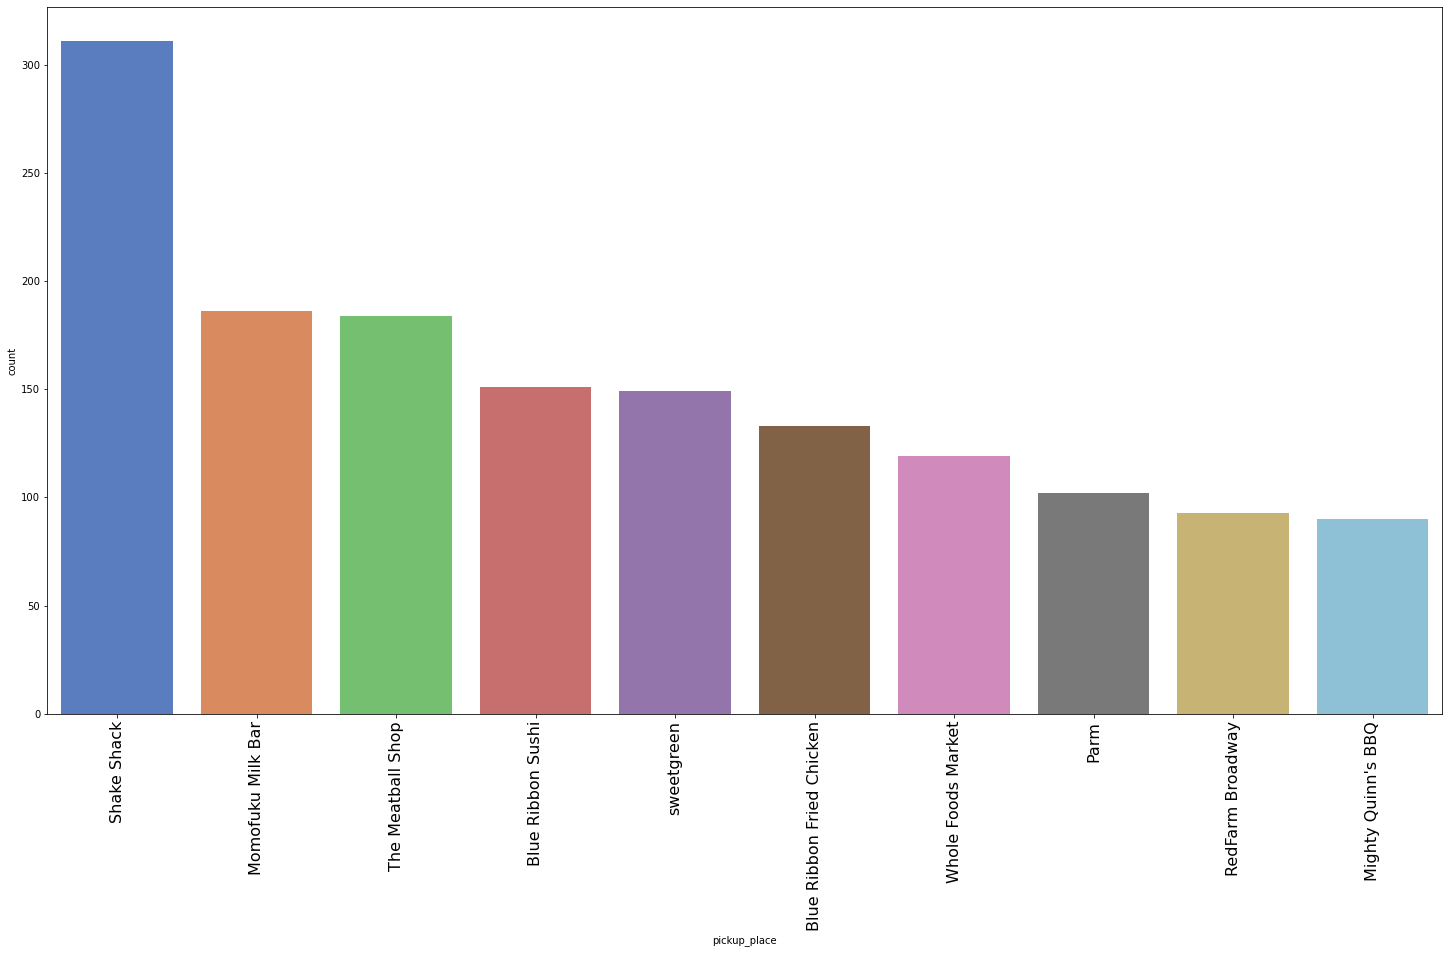

In [187]:
pickup_10 = list(data['pickup_place'].value_counts().head(10).reset_index()['index'])
pickup_data10 = data[data['pickup_place'].isin(pickup_10)]

plt.figure(figsize=(25,13))
pickup_place = sns.countplot(pickup_data10['pickup_place'],palette='muted',order=pickup_data10['pickup_place'].value_counts().index)
plt.xticks(fontsize=16,rotation=90)
plt.savefig('pickup_place.png')

In [39]:
data[data['pickup_place']=='Shake Shack'].head(10)

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
9,1417206,153816,157415,car,Shake Shack,Burger,Shackburger,1.0,Burgers,NaN,40.758457,-73.989140,40.743613,-73.977684,2014-10-21 21:18:37.909545,2014-10-21 21:20:14.434227,2014-10-21 21:47:03.624931,2014-10-21 21:59:26.081278
22,1320596,368663,125504,bicycle,Shake Shack,Burger,Shack-cago Dog,1.0,Flat-Top Dogs,NaN,40.780826,-73.976483,40.801488,-73.969690,2014-10-08 20:53:52.039403,2014-10-08 20:59:18.079384,2014-10-08 21:14:42.577492,2014-10-08 21:23:52.213217
48,1320822,149508,43955,bicycle,Shake Shack,Burger,Cheese Fries,1.0,Fries,NaN,40.715279,-74.014860,40.716168,-74.003693,2014-10-08 21:18:11.900324,2014-10-08 21:28:15.142224,2014-10-08 21:47:35.029385,2014-10-08 21:54:36.734336
64,1414452,148033,128139,car,Shake Shack,Burger,NaN,NaN,NaN,NaN,40.682770,-73.976532,40.693256,-73.966173,2014-10-21 14:57:29.338613,2014-10-21 15:30:02.259968,2014-10-21 15:31:21.050095,2014-10-21 15:37:44.276996
137,1299559,148327,118093,scooter,Shake Shack,Burger,Fries,1.0,Fries,NaN,40.692146,-73.988865,40.701972,-73.987036,2014-10-05 12:30:23.27789,2014-10-05 13:07:23.30729,2014-10-05 13:26:13.134353,2014-10-05 13:35:38.318512
139,1461185,363561,175485,bicycle,Shake Shack,Burger,Hamburger,1.0,Burgers,NaN,40.780826,-73.976483,40.789489,-73.974972,2014-10-26 18:05:44.469854,2014-10-26 18:12:16.542026,2014-10-26 18:37:15.826591,2014-10-26 18:48:33.02631
177,1446099,373059,103194,bicycle,Shake Shack,Burger,Hamburger,1.0,Burgers,NaN,40.779126,-73.954905,40.782443,-73.972112,2014-10-25 13:36:51.559587,2014-10-25 13:36:00.549432,2014-10-25 13:57:18.263788,2014-10-25 14:10:22.785341
190,1332526,48677,152676,bicycle,Shake Shack,Burger,Fountain Soda,1.0,Drinks,NaN,40.715279,-74.014860,40.724520,-73.993420,2014-10-10 18:41:05.90546,2014-10-10 19:04:31.649579,2014-10-10 19:46:22.211936,2014-10-10 20:15:31.476676
207,1332526,48677,152676,bicycle,Shake Shack,Burger,Smoke Shack,1.0,Burgers,NaN,40.715279,-74.014860,40.724520,-73.993420,2014-10-10 18:41:05.90546,2014-10-10 19:04:31.649579,2014-10-10 19:46:22.211936,2014-10-10 20:15:31.476676
243,1284971,351749,104989,bicycle,Shake Shack,Burger,Smoke Shack,1.0,Burgers,NaN,40.715279,-74.014860,40.702575,-74.012490,2014-10-03 11:58:55.69654,2014-10-03 12:15:35.786309,2014-10-03 12:48:56.01099,2014-10-03 13:17:35.856869


In [62]:
data[data['customer_id']==368663]
# we should probably group together delivery ids to represent analysis more accurately

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
22,1320596,368663,125504,bicycle,Shake Shack,Burger,Shack-cago Dog,1.0,Flat-Top Dogs,NaN,40.780826,-73.976483,40.801488,-73.96969,2014-10-08 20:53:52.039403,2014-10-08 20:59:18.079384,2014-10-08 21:14:42.577492,2014-10-08 21:23:52.213217
3704,1320596,368663,125504,bicycle,Shake Shack,Burger,Chicken Dog,1.0,Flat-Top Dogs,NaN,40.780826,-73.976483,40.801488,-73.96969,2014-10-08 20:53:52.039403,2014-10-08 20:59:18.079384,2014-10-08 21:14:42.577492,2014-10-08 21:23:52.213217


In [18]:
data['vehicle_type'].value_counts()

bicycle       4274
car           1215
walker         274
van             76
scooter         75
truck           48
motorcycle      21
Name: vehicle_type, dtype: int64

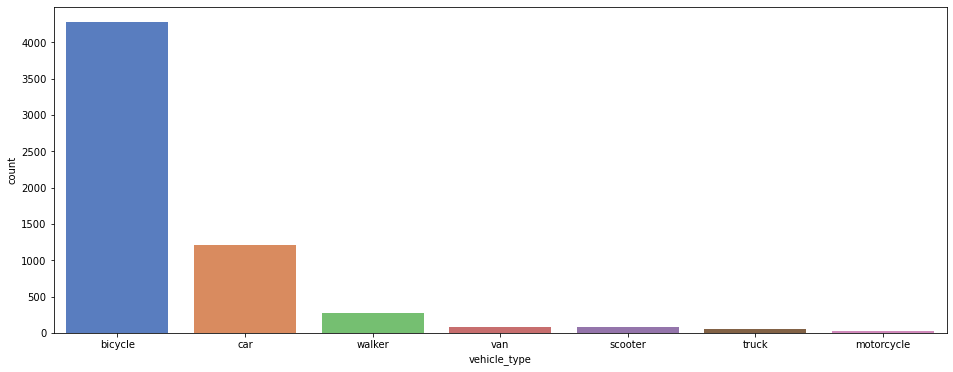

In [176]:
plt.figure(figsize = (16,6))
veh_type = sns.countplot(data['vehicle_type'],palette='muted',order=data['vehicle_type'].value_counts().index)
plt.savefig('vehicle_type.png')

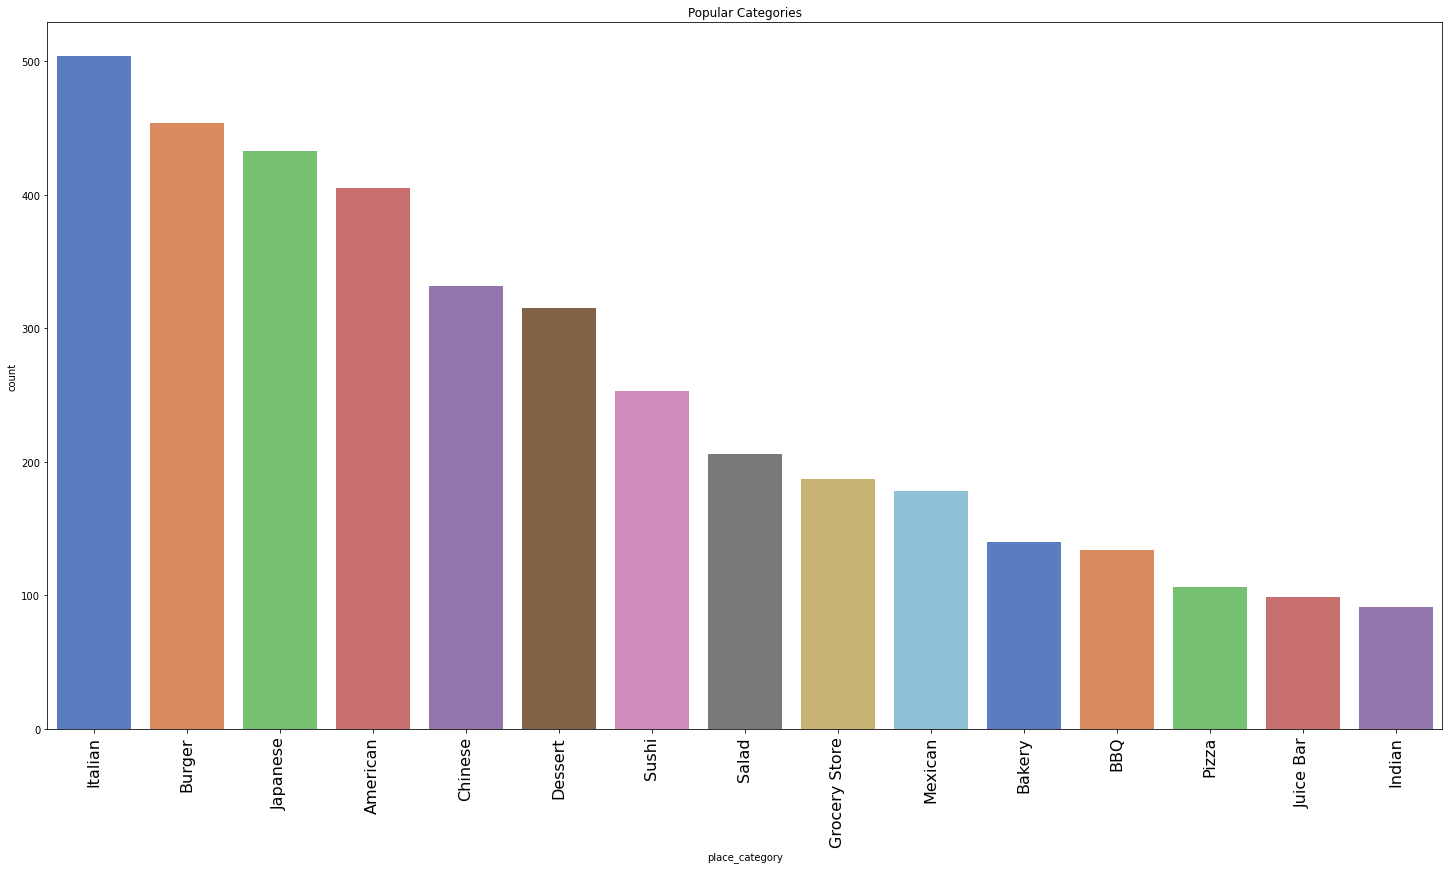

In [190]:
places_10 = list(data['place_category'].value_counts().head(10).reset_index()['index'])
places_data10 = data[data['place_category'].isin(places_10)]

plt.figure(figsize=(25,13))
places_cat = sns.countplot(places_data15['place_category'],palette='muted',order=places_data15['place_category'].value_counts().index)
plt.xticks(fontsize=16,rotation=90)
plt.title('Popular Categories')
plt.savefig('places_cat.png')

In [40]:
data['item_quantity'].value_counts()

1.0     3980
2.0      570
3.0      112
4.0       54
6.0       14
5.0       13
8.0        4
15.0       3
16.0       1
12.0       1
7.0        1
Name: item_quantity, dtype: int64

In [49]:
data[data['item_quantity']>1]

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061
5,1423142,75169,91932,bicycle,Tamarind TriBeCa,Indian,Dum Aloo Gobi,1.0,Vegetarian Specialties,00:07:14.327405,40.719269,-74.008750,40.725678,-74.000618,2014-10-22 18:56:36.348939,2014-10-22 19:18:49.953427,2014-10-22 19:27:10.57897,2014-10-22 19:36:53.801191
6,1334106,101347,124897,bicycle,The Loop,Sushi,Spicy Tuna Roll,1.0,Classic Roll & Hand Roll,00:04:49.413655,40.734858,-73.986093,40.738368,-74.000105,2014-10-10 21:08:55.489926,2014-10-10 21:07:15.966292,2014-10-10 21:29:24.500711,2014-10-10 21:40:01.697548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5978,1360750,378035,151467,bicycle,Five Guys Burgers and Fries,Burger,Cheeseburger,1.0,Burgers,NaN,40.804404,-73.966430,40.818637,-73.939241,2014-10-14 13:30:25.567577,2014-10-14 13:41:09.42809,2014-10-14 13:53:28.264588,2014-10-14 14:10:19.256853
5979,1348697,96943,3296,bicycle,Cafe Mogador,Middle Eastern,Vegetarian,1.0,Cous Cous,NaN,40.727293,-73.984517,40.725938,-73.980550,2014-10-12 18:37:42.565897,2014-10-12 18:44:21.331886,2014-10-12 18:54:16.442017,2014-10-12 19:00:43.047785
5980,1274438,355090,153113,bicycle,Shake Shack,Burger,Fries,1.0,Fries,NaN,40.780826,-73.976483,40.763573,-73.973503,2014-10-01 18:12:56.973655,2014-10-01 18:29:59.803516,2014-10-01 18:52:19.769244,2014-10-01 19:16:52.653179
5981,1470282,400983,142140,car,Omai,Vietnamese,Ca Tim,1.0,Appetizers,00:02:17.264098,40.744408,-74.002891,40.734609,-74.006405,2014-10-27 20:25:03.592287,2014-10-27 20:22:37.822461,2014-10-27 20:39:25.770399,2014-10-27 20:50:45.259345


In [48]:
data['place_category'].value_counts()[data['place_category'].value_counts()<10]

Department Store         9
Russian                  9
Vietnamese               8
Caribbean                7
Specialty Store          5
Office Supplies Store    5
German                   4
Kids & Baby              3
Beauty Supply            2
Pet Supplies Store       1
Restaurant               1
Book Store               1
Clothing                 1
Art Store                1
African                  1
Name: place_category, dtype: int64

In [59]:
data['pickup_lat'].max(),data['pickup_lat'].min(),data['pickup_lon'].max(),data['pickup_lon'].min()

(40.8180821, 40.665610864239504, -73.9209796666667, -74.0158367156982)

In [60]:
data['dropoff_lat'].max(),data['dropoff_lat'].min(),data['dropoff_lon'].max(),data['dropoff_lon'].min()

(40.848324, 40.649355808310794, -73.9241235238257, -74.0176786)

**I used open maps to find a map which was inclusive of the range of all dropoff and pickup lat-lon coordinates to map out**

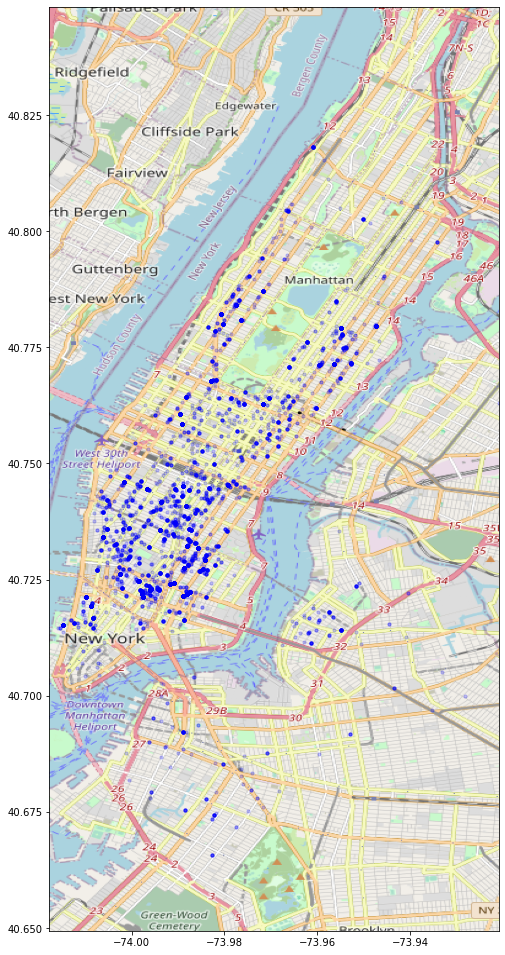

In [178]:
fig, pickups = plt.subplots(figsize = (28,17))
BBox = ((-74.0177,   -73.9210,      
         40.6494, 40.848324))

pickups.scatter(data['pickup_lon'],data['pickup_lat'], zorder = 1, alpha = 0.2, c = 'b', s = 10)
pickups.imshow(nyc_m,zorder=0,extent=BBox)
plt.savefig('nyc_pickups.png')

**Pick up clusters show a clear concentration of pickups from businesses to the southern end of NYC**

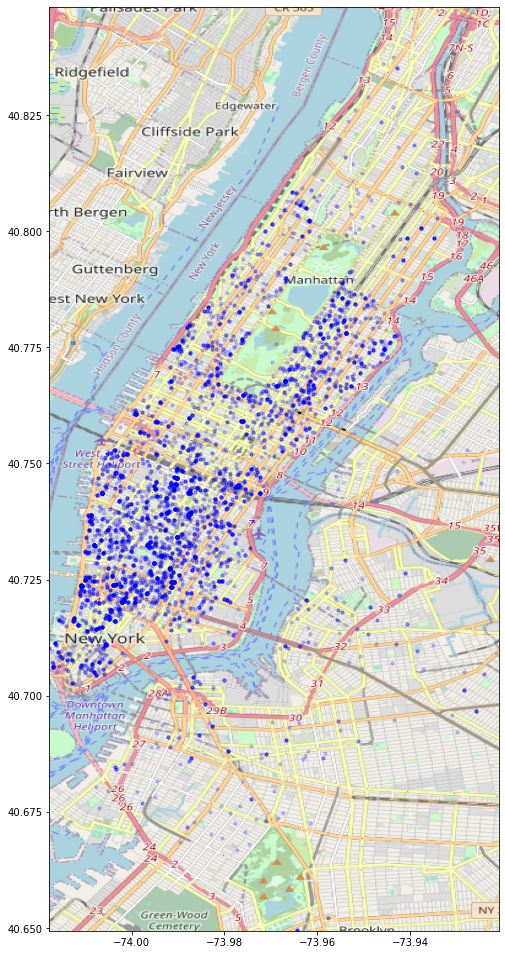

In [179]:
fig, dropoffs = plt.subplots(figsize = (28,17))
BBox = ((-74.0177,   -73.9210,      
         40.6494, 40.848324))

dropoffs.scatter(data['dropoff_lon'],data['dropoff_lat'], zorder = 1, alpha = 0.2, c = 'b', s = 10)
dropoffs.imshow(nyc_m,zorder=0,extent=BBox)
plt.savefig('nyc_dropoffs.png')

**Clusters of dropoffs show a very dense concentration of demand around central park and the southern end where a lot of businesses are**

In [98]:
def get_distance():
    for i in range(data.shape[0]):
        data['delivery_distance'][i] = distance((data['pickup_lat'][i],data['pickup_lon'][i]),(data['dropoff_lat'][i],data['dropoff_lon'][i])).miles

In [99]:
data['delivery_distance']= pd.DataFrame(np.zeros(data.shape[0],))
get_distance()

In [100]:
data.columns

Index(['delivery_id', 'customer_id', 'jumpman_id', 'vehicle_type',
       'pickup_place', 'place_category', 'item_name', 'item_quantity',
       'item_category_name', 'how_long_it_took_to_order', 'pickup_lat',
       'pickup_lon', 'dropoff_lat', 'dropoff_lon', 'when_the_delivery_started',
       'when_the_Jumpman_arrived_at_pickup', 'when_the_Jumpman_left_pickup',
       'when_the_Jumpman_arrived_at_dropoff', 'delivery_distance'],
      dtype='object')

<AxesSubplot:xlabel='vehicle_type'>

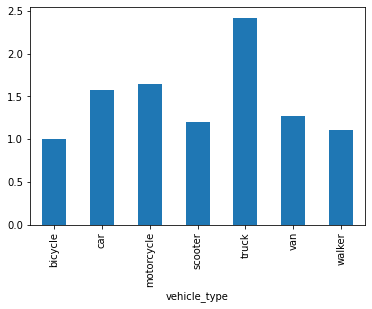

In [118]:
data.groupby(['vehicle_type'])['delivery_distance'].agg('mean').plot(kind='bar')

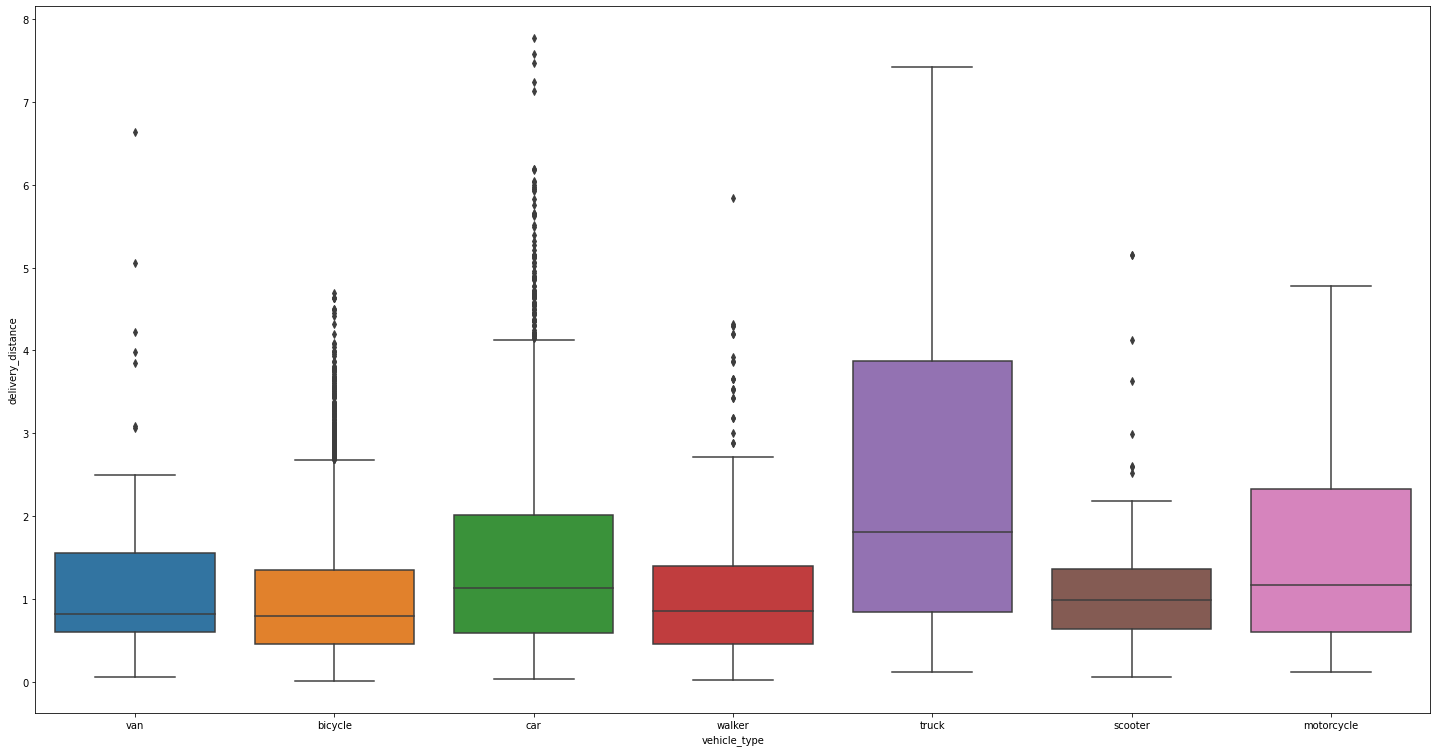

In [180]:
plt.figure(figsize=(25,13))
delivery_distance_box = sns.boxplot(x='vehicle_type',y='delivery_distance',data=data)
plt.savefig('delivery_distance_box.png')

**Wallkers have an average distance traveled of a mile per delivery? This seems inefficient.**

In [136]:
data['when_the_Jumpman_left_pickup'] = pd.to_datetime(data['when_the_Jumpman_left_pickup'])
data['when_the_Jumpman_arrived_at_dropoff'] = pd.to_datetime(data['when_the_Jumpman_arrived_at_dropoff'])
data['when_the_Jumpman_arrived_at_pickup'] = pd.to_datetime(data['when_the_Jumpman_arrived_at_pickup'])
data['when_the_delivery_started'] = pd.to_datetime(data['when_the_delivery_started'])

In [160]:
data['delivery_time'] = data['when_the_Jumpman_arrived_at_dropoff'] - data['when_the_Jumpman_left_pickup']
data['delivery_time'] = data['delivery_time'].astype('timedelta64[m]')

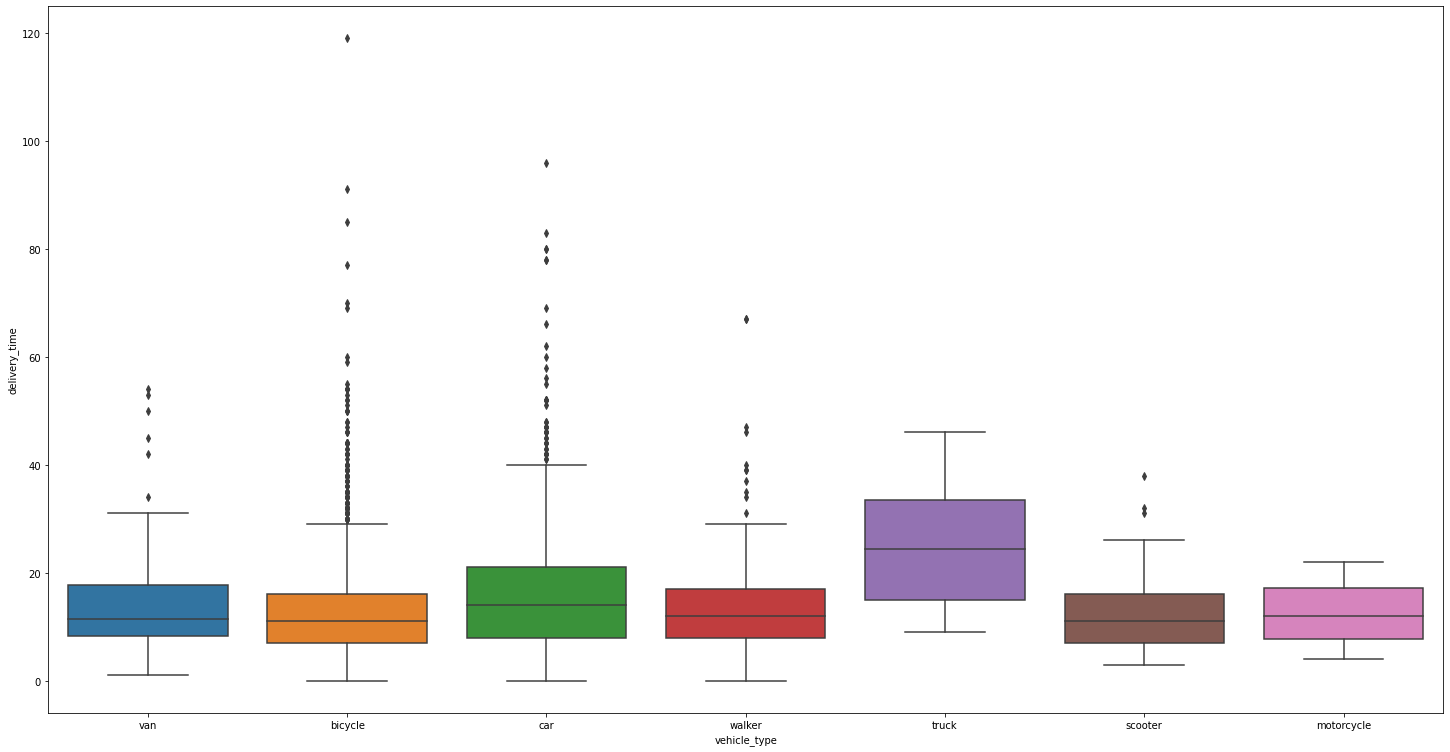

In [181]:
plt.figure(figsize=(25,13))
delivery_time_box = sns.boxplot(x='vehicle_type',y='delivery_time',data=data)
plt.savefig('delivery_time_box.png')

In [162]:
data['delivery_rate'] = data['delivery_distance']/data['delivery_time']

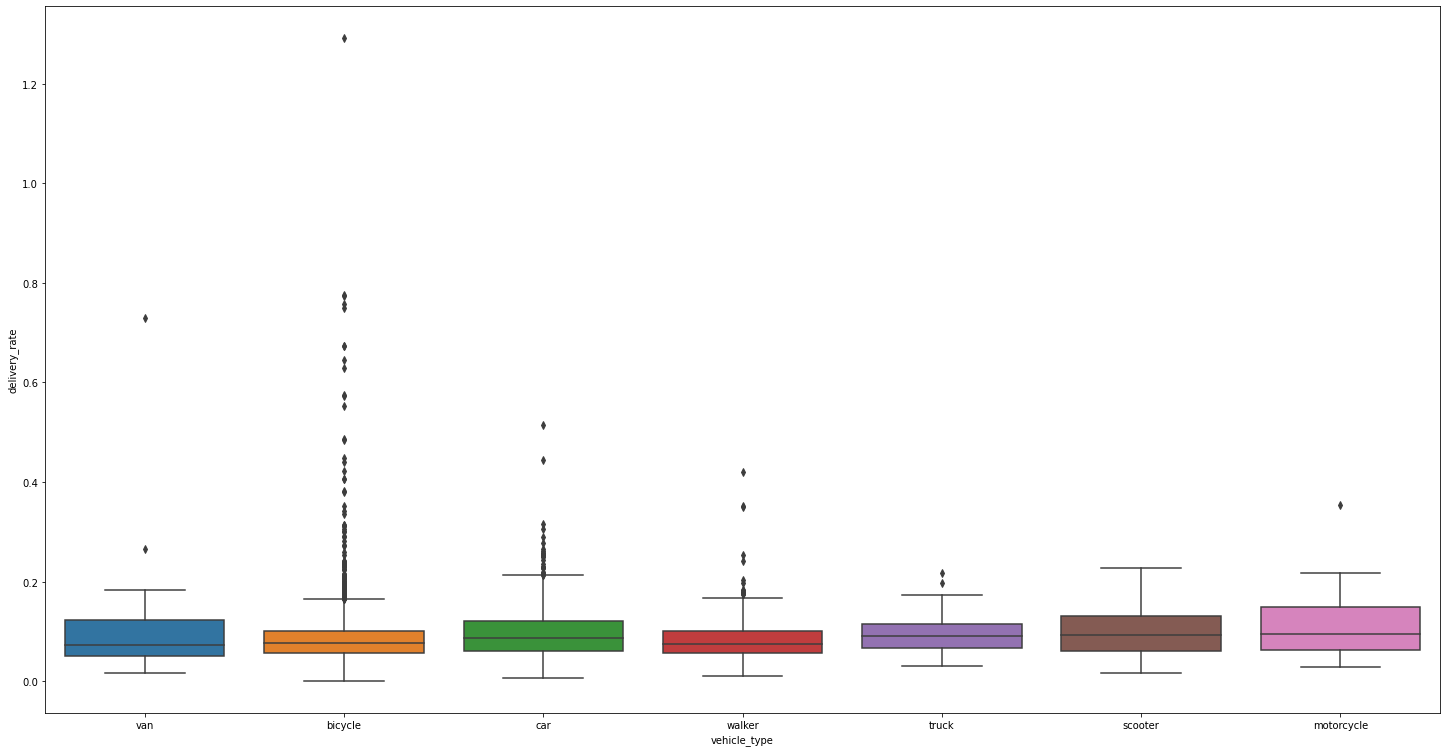

In [182]:
plt.figure(figsize=(25,13))
delivery_rate_box = sns.boxplot(x='vehicle_type',y='delivery_rate',data=data)
plt.savefig('delivery_rate_box.png')

In [174]:
vehicle_delivery_agg = data.groupby(['vehicle_type','delivery_id'])['item_quantity'].agg('sum')
vehicle_delivery_agg

vehicle_type  delivery_id
bicycle       1271751        0.0
              1271867        2.0
              1272279        1.0
              1272303        0.0
              1272363        0.0
                            ... 
walker        1486627        2.0
              1489104        1.0
              1491147        0.0
              1491341        1.0
              1491424        2.0
Name: item_quantity, Length: 5214, dtype: float64